# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
print(dataset.shape)

(10000, 10)


In [4]:
dataset.head(5)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Implementing Thompson Sampling

In [8]:
import random
N = dataset.shape[0] # Users (Rows)
d = dataset.shape[1] # Ads (Columns)

# Initialize Variables
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

# Thompson sampling
for n in range(N): # iterating through Users (Rows)
    ad = 0
    max_random_beta = 0
    for i in range(d): # iterating through Ads (Columns)
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random_beta:
            max_random_beta = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    # reward = datase.iloc[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
    total_reward += reward


In [9]:
total_reward

2600

In [10]:
n = 100  # Number of items per row
for i in range(0, len(ads_selected), n):
    print(*ads_selected[i:i+n]) # * unpacking operator

7 6 0 1 1 8 4 1 2 4 3 9 5 7 8 0 1 3 3 1 5 6 2 1 4 6 5 1 1 2 4 0 8 4 4 1 4 8 3 2 1 3 4 1 4 3 4 9 1 7 6 2 3 1 4 4 9 2 4 7 7 3 2 6 1 0 4 6 2 8 4 9 1 1 7 1 5 4 1 1 3 5 1 4 3 1 4 3 1 9 2 3 2 1 1 3 1 7 1 1
5 6 8 3 0 4 9 7 4 1 9 5 4 1 4 4 1 9 2 2 9 1 0 1 6 4 8 1 0 4 3 4 1 1 9 4 1 7 0 1 4 4 1 4 3 9 1 4 4 0 1 4 0 1 4 1 1 8 6 4 1 7 4 4 4 9 1 2 4 8 4 1 4 2 4 1 8 4 3 4 4 4 7 3 8 5 1 4 4 4 6 0 4 5 4 4 8 8 1 1
4 0 1 4 7 1 8 5 4 2 7 4 0 6 4 4 4 1 8 4 9 4 9 1 1 4 4 8 9 6 1 0 4 2 3 1 9 4 7 0 1 9 7 7 1 6 0 9 5 1 1 1 4 0 4 3 2 9 5 4 0 4 4 4 4 4 4 4 4 0 8 4 7 5 4 4 4 2 1 4 9 1 9 4 4 4 4 1 0 9 4 1 9 4 1 1 3 1 4 4
4 0 4 4 0 1 4 1 0 1 4 4 1 1 6 4 8 4 9 4 4 1 4 1 3 4 4 4 0 4 4 1 4 8 4 7 9 4 8 1 4 4 4 4 0 4 1 4 1 1 1 4 0 7 9 4 6 1 7 1 4 4 4 8 1 4 4 4 1 4 4 1 8 5 2 0 1 8 1 4 4 6 0 0 0 4 4 4 1 4 4 4 1 4 1 4 7 1 6 8
1 4 4 4 4 1 1 0 8 4 3 4 0 5 8 3 0 0 4 3 4 4 4 4 4 4 4 4 4 4 4 8 1 4 4 4 4 3 5 4 4 0 4 4 2 0 4 3 4 3 4 4 4 4 4 4 4 1 4 4 4 4 3 4 3 4 3 3 4 4 4 4 4 9 2 4 2 1 4 4 1 3 4 6 4 1 4 4 4 4 1 4 4 2 7 4 4 7 4 4


## Visualising the results - Histogram

In [11]:
from collections import Counter
Counter(ads_selected)

Counter({7: 375,
         6: 23,
         0: 87,
         1: 133,
         8: 85,
         4: 9131,
         2: 42,
         3: 63,
         9: 37,
         5: 24})

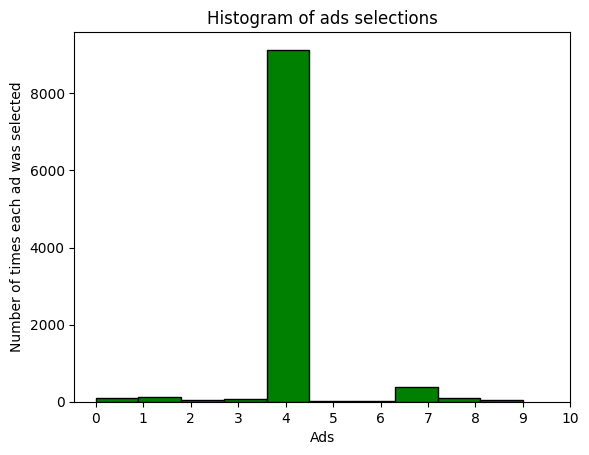

In [13]:
plt.hist(ads_selected, edgecolor='black', linewidth=1, color = 'green')
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.xticks(range(0, 11))
plt.ylabel('Number of times each ad was selected')
plt.show()